# Assignment ETL
## Task 1
### 1)

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.impute import SimpleImputer
from datasist.structdata import detect_outliers
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [6]:
df_rest=pd.read_csv('dastasets\Restaurant_Reviews.csv', sep='\t')
df_rest.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [7]:
df_rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [8]:
# Exploring
df_rest.Liked.value_counts()

1    500
0    500
Name: Liked, dtype: int64

In [11]:
c_vectorizer=CountVectorizer(stop_words='english')
vector1=c_vectorizer.fit_transform(df_rest.Review)
df_vect1=pd.DataFrame(vector1.toarray(), columns=c_vectorizer.get_feature_names())
df_vect1.head()

,00,10,100,11,12,15,17,1979,20,2007,...,year,years,yellow,yellowtail,yelpers,yucky,yukon,yum,yummy,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
df_vect1.wow.value_counts()

0    997
1      3
Name: wow, dtype: int64

### 2)

In [ ]:
t_vectorizer=TfidfVectorizer(stop_words='english')
vector2=t_vectorizer.fit_transform(df_rest.Review)
df_vect2=pd.DataFrame(vector2.toarray(), columns=t_vectorizer.get_feature_names())
df_vect2.sample(5)

In [30]:
df_vect2.wow.value_counts()

0.000000    997
0.660408      1
0.713495      1
0.389232      1
Name: wow, dtype: int64

In [39]:
# Validation
df_rest.loc[df_rest['Review'].str.lower().str.contains('wow')]

,Review,Liked
0,Wow... Loved this place.,1
277,The goat taco didn't skimp on the meat and wow...,1
438,Wow very spicy but delicious.,1


## Task 2
### 1)

In [255]:
df_fri=pd.read_csv('dastasets/black_friday.csv')
df_fri.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [256]:
df_fri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


No N/A vlaues at 'Product_Category_1'

In [152]:
# Check for present values in 'Product_Category_3' while not available in 'Product_Category_2'
df_fri.loc[df_fri['Product_Category_2'].isnull() & df_fri['Product_Category_3'].notna()].sum()
# Nothing

User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category_1            0.0
Product_Category_2            0.0
Product_Category_3            0.0
Purchase                      0.0
dtype: float64

In [153]:
np.sort(df_fri['Product_Category_1'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20], dtype=int64)

In [154]:
np.sort(df_fri['Product_Category_2'].unique())

array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
       15., 16., 17., 18., nan])

In [155]:
np.sort(df_fri['Product_Category_3'].unique())

array([ 3.,  4.,  5.,  6.,  8.,  9., 10., 11., 12., 13., 14., 15., 16.,
       17., 18., nan])

From Above, we can conclude that, Product_Categories are likely an estimate for the product category, ranging in 20 category types. Being 1 as the most probable one (without null values), then 2 and rather 3 being with less probability estimation for the product category. That's why, null values in 2 signify null in 3 also.
<br/><!--\n-->
From this understanding, these null values to be compensated with zeros.

In [257]:
# Fill na_values with a constant '0'
imp_const=SimpleImputer(strategy='constant')
cols=['Product_Category_2','Product_Category_3']
for col in cols:
    df_fri[col]=imp_const.fit_transform(df_fri[[col]])
df_fri.isnull().sum()
# Confirming on no-more null values

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

- _Age_

In [157]:
df_fri.Age.value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [258]:
# Working with 'Age' as a categorical ordinal feature
Age_dict={'0-17':0, '18-25':1, '26-35':2, '36-45':3, '46-50':4, '51-55':5, '55+':6}
df_fri['Age']=df_fri['Age'].map(Age_dict)
df_fri.sample(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
179426,1003729,P00178242,M,1,4,A,2,0,8,0.0,0.0,9695
55071,1002446,P00216042,M,1,7,B,0,0,5,8.0,0.0,8681
520211,1002050,P00220442,F,3,3,C,2,0,5,14.0,0.0,7053
110249,1004984,P00177542,M,3,0,A,1,1,1,8.0,0.0,3916
302374,1004510,P00135142,M,4,7,A,4+,1,13,16.0,0.0,558
394009,1000669,P00294242,M,2,17,B,2,0,4,5.0,0.0,2124
137207,1003225,P00182142,M,1,0,C,1,0,1,5.0,6.0,11818
415451,1003929,P00327342,M,2,5,B,1,1,16,0.0,0.0,16170
540943,1005306,P00183542,F,2,17,B,4+,0,4,5.0,0.0,2141
97821,1003182,P00205842,M,2,12,A,2,1,5,0.0,0.0,3509


<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

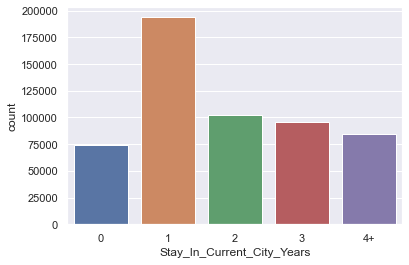

In [159]:
# Review values of '4+' contribution to the dataframe
sns.set()
sns.countplot(x='Stay_In_Current_City_Years', data=df_fri, order=['0','1','2','3','4+'])

In [259]:
# replace'4+' with numeric 4, and converting staying years column into numbers
df_fri['Stay_In_Current_City_Years'].replace('4+',4,True)
df_fri.Stay_In_Current_City_Years = pd.to_numeric(df_fri['Stay_In_Current_City_Years'], downcast='integer')
df_fri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  int64  
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  int8   
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Product_Category_3          550068 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(6), int8(1), object(3)
memory usage: 46.7+ MB


In [161]:
df_fri.City_Category.unique()
# 3 unique categories

array(['A', 'C', 'B'], dtype=object)

In [260]:
# Working with 'City_Category' as a categorical Nominal feature
df_fri=pd.get_dummies(df_fri, columns=['City_Category','Gender'], drop_first=True)
df_fri.head(7)

,User_ID,Product_ID,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_B,City_Category_C,Gender_M
0,1000001,P00069042,0,10,2,0,3,0.0,0.0,8370,0,0,0
1,1000001,P00248942,0,10,2,0,1,6.0,14.0,15200,0,0,0
2,1000001,P00087842,0,10,2,0,12,0.0,0.0,1422,0,0,0
3,1000001,P00085442,0,10,2,0,12,14.0,0.0,1057,0,0,0
4,1000002,P00285442,6,16,4,0,8,0.0,0.0,7969,0,1,1
5,1000003,P00193542,2,15,3,0,1,2.0,0.0,15227,0,0,1
6,1000004,P00184942,4,7,2,1,1,8.0,17.0,19215,1,0,1


- Outliers detection

<AxesSubplot:xlabel='Purchase'>

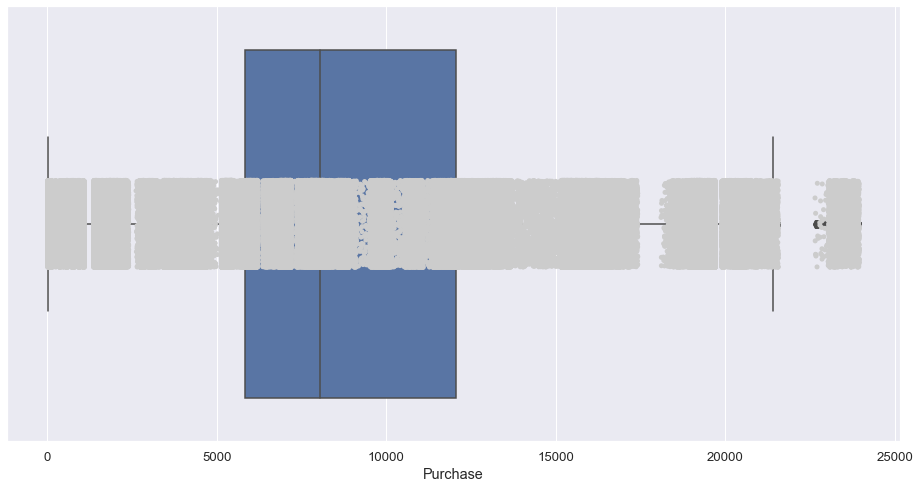

In [196]:
sns.set(rc={'figure.figsize': [16, 8]}, font_scale=1.2)
sns.boxplot(x='Purchase', data=df_fri)
sns.stripplot(x='Purchase', data=df_fri, color='.8')

In [261]:
outliers_indices=detect_outliers(df_fri, 0, df_fri[['Purchase']])
df_fri.drop(outliers_indices, inplace=True)

<AxesSubplot:xlabel='Purchase'>

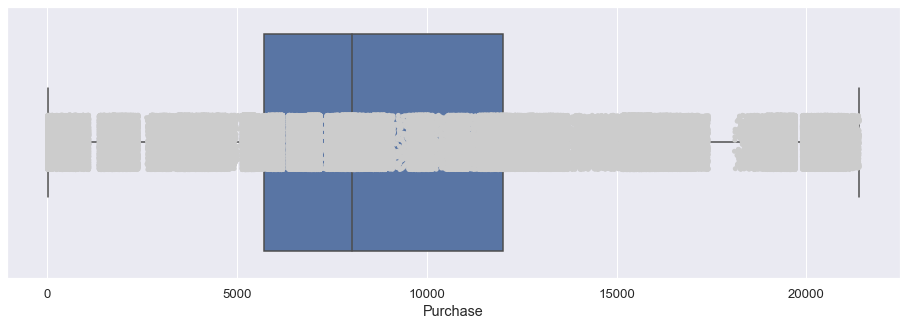

In [224]:
# After removing outliers
sns.set(rc={'figure.figsize': [16, 5]}, font_scale=1.2)
sns.boxplot(x='Purchase', data=df_fri)
sns.stripplot(x='Purchase', data=df_fri, color='.8')

- Training & Testing data parts

In [262]:
X=df_fri.drop(['User_ID','Product_ID','Purchase'], axis=1)
y=df_fri.Purchase
X_train, X_test, y_train, y_test=train_test_split(X,y)

- Imbalanced data

In [226]:
y_train.value_counts()*100/len(y_train)

6883     0.036537
6879     0.035806
6855     0.035806
7012     0.035563
7011     0.034832
           ...   
18641    0.000244
13928    0.000244
8487     0.000244
18399    0.000244
17028    0.000244
Name: Purchase, Length: 16565, dtype: float64

In [227]:
print(sorted(Counter(y_train).items()))

[(12, 77), (13, 75), (14, 72), (24, 87), (25, 77), (26, 83), (36, 87), (37, 89), (38, 89), (48, 82), (49, 71), (50, 84), (60, 89), (61, 80), (62, 69), (118, 14), (119, 17), (120, 21), (121, 14), (122, 15), (123, 9), (124, 20), (125, 10), (126, 17), (127, 19), (128, 16), (129, 24), (130, 10), (131, 14), (132, 10), (133, 13), (134, 14), (135, 11), (136, 15), (137, 9), (138, 24), (139, 13), (140, 17), (141, 15), (185, 3), (186, 4), (187, 3), (188, 5), (189, 1), (190, 3), (191, 3), (192, 3), (193, 3), (194, 1), (195, 4), (196, 2), (197, 6), (198, 1), (199, 4), (201, 4), (202, 2), (204, 5), (206, 1), (207, 2), (209, 5), (210, 2), (212, 2), (213, 3), (214, 3), (215, 3), (216, 5), (217, 3), (218, 2), (219, 1), (220, 1), (221, 1), (222, 2), (236, 18), (237, 15), (238, 12), (239, 18), (240, 9), (241, 19), (242, 10), (243, 18), (244, 15), (245, 14), (246, 11), (247, 13), (248, 15), (249, 17), (250, 13), (251, 16), (252, 18), (253, 15), (254, 22), (255, 15), (256, 16), (257, 13), (258, 12), (259,

There are an unbalanced ratio of observations in 'Purchases'

In [263]:
rus=RandomUnderSampler(random_state=0)
X_resampled, y_resampled=rus.fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))

[(12, 1), (13, 1), (14, 1), (24, 1), (25, 1), (26, 1), (36, 1), (37, 1), (38, 1), (48, 1), (49, 1), (50, 1), (60, 1), (61, 1), (62, 1), (118, 1), (119, 1), (120, 1), (121, 1), (122, 1), (123, 1), (124, 1), (125, 1), (126, 1), (127, 1), (128, 1), (129, 1), (130, 1), (131, 1), (132, 1), (133, 1), (134, 1), (135, 1), (136, 1), (137, 1), (138, 1), (139, 1), (140, 1), (141, 1), (185, 1), (186, 1), (187, 1), (188, 1), (189, 1), (190, 1), (191, 1), (192, 1), (193, 1), (194, 1), (195, 1), (196, 1), (197, 1), (198, 1), (199, 1), (201, 1), (202, 1), (204, 1), (205, 1), (207, 1), (208, 1), (209, 1), (210, 1), (211, 1), (213, 1), (214, 1), (215, 1), (216, 1), (217, 1), (218, 1), (219, 1), (220, 1), (221, 1), (222, 1), (236, 1), (237, 1), (238, 1), (239, 1), (240, 1), (241, 1), (242, 1), (243, 1), (244, 1), (245, 1), (246, 1), (247, 1), (248, 1), (249, 1), (250, 1), (251, 1), (252, 1), (253, 1), (254, 1), (255, 1), (256, 1), (257, 1), (258, 1), (259, 1), (342, 1), (343, 1), (344, 1), (346, 1), (347

In [265]:
scaler=MinMaxScaler()
scaler.fit(X_resampled)
scl_X_train=scaler.transform(X_resampled)
scl_X_test=scaler.transform(X_test)

In [273]:
# Display final scaled data (training X part)
pd.DataFrame(scl_X_train, columns=X_resampled.columns)

,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,City_Category_B,City_Category_C,Gender_M
0,0.333333,0.30,0.75,0.0,0.947368,0.000000,0.0,1.0,0.0,1.0
1,0.500000,0.85,0.75,0.0,0.947368,0.000000,0.0,0.0,1.0,1.0
2,0.833333,0.00,0.25,1.0,0.947368,0.000000,0.0,0.0,1.0,1.0
3,0.333333,0.95,0.25,0.0,0.947368,0.000000,0.0,0.0,1.0,1.0
4,0.166667,0.15,0.25,0.0,0.947368,0.000000,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
16628,0.666667,0.40,0.25,1.0,0.736842,0.000000,0.0,1.0,0.0,1.0
16629,0.333333,0.75,0.75,0.0,0.736842,0.000000,0.0,1.0,0.0,1.0
16630,0.333333,0.10,0.25,1.0,0.736842,0.000000,0.0,0.0,0.0,1.0
16631,0.166667,0.20,0.75,0.0,0.736842,0.000000,0.0,1.0,0.0,1.0


### 2)

In [33]:
df_ln=pd.read_csv('dastasets\loan_data.csv')
df_ln.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [34]:
df_ln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [35]:
df_ln['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [36]:
# Working with 'purpose' as a categorical Nominal feature
df_ln=pd.get_dummies(df_ln, columns=['purpose'], drop_first=True)
df_ln.sample(3)

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
8575,0,0.1576,148.04,10.819778,21.50,652,5519.958333,17817,55.5,1,0,0,1,1,0,0,0,0,0
5774,1,0.1496,277.16,11.350407,17.34,667,3360.041667,8590,87.7,1,0,0,0,0,0,0,1,0,0
8627,0,0.1355,163.01,10.502324,4.65,652,2040.000000,4684,80.8,1,1,0,0,1,0,0,0,0,0


Checking for outliers

<AxesSubplot:xlabel='revol.bal'>

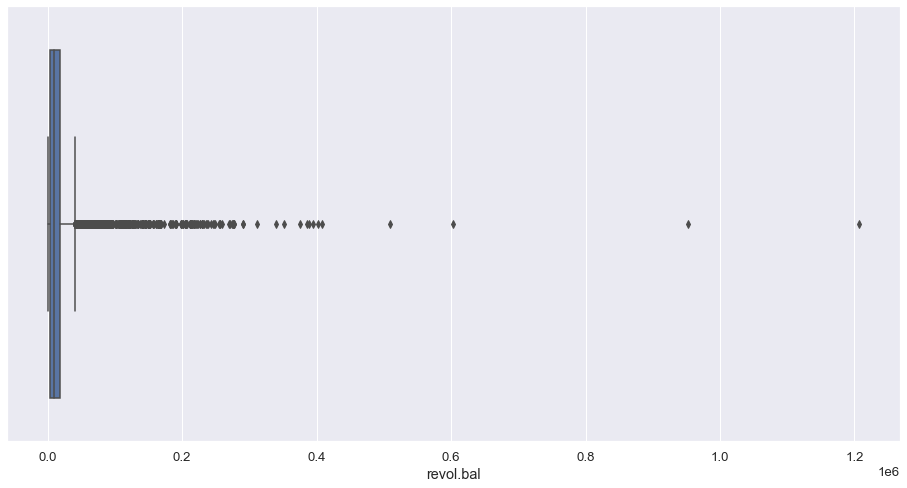

In [40]:
sns.set(rc={'figure.figsize': [16, 8]}, font_scale=1.2)
sns.boxplot(x='revol.bal', data=df_ln)
#sns.stripplot(x='revol.bal', data=df_ln, color='.8')

<AxesSubplot:xlabel='revol.bal', ylabel='Count'>

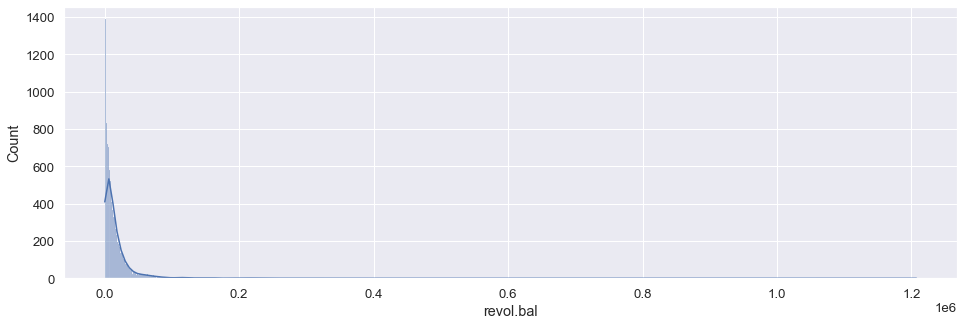

In [43]:
sns.set(rc={'figure.figsize': [16, 5]}, font_scale=1.2)
sns.histplot(data=df_ln, x='revol.bal', kde=True)

In [46]:
outliers_indices=detect_outliers(df_ln, 0, df_ln[['installment','revol.bal']])
df_ln.drop(outliers_indices, inplace=True)

In [50]:
len(outliers_indices)
# 949 observations are removed

949

<AxesSubplot:xlabel='revol.bal', ylabel='Count'>

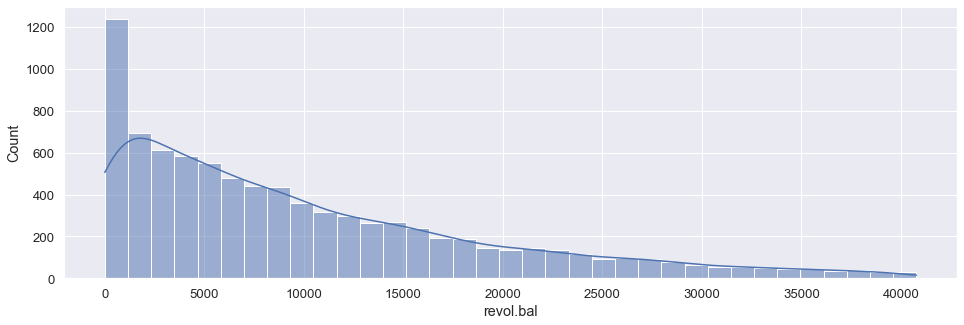

In [54]:
# Check again
sns.histplot(data=df_ln,x='revol.bal', kde=True)

In [55]:
X=df_ln.drop(['not.fully.paid'], axis=1)
y=df_ln['not.fully.paid']
X_train, X_test, y_train, y_test=train_test_split(X,y)

Imbalanced data

In [56]:
sorted(Counter(y_train).items())

[(0, 5486), (1, 985)]

In [58]:
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)
sorted(Counter(y_resampled).items())

[(0, 5486), (1, 5486)]

Scaling

In [61]:
scaler = StandardScaler().fit(X_resampled)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [63]:
# Display final scaled data (training X part)
pd.DataFrame(X_scaled_train, columns=X_train.columns).sample(10)

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
2514,-1.494244,1.983595,-1.498664,-1.263973,-1.477386,-0.924327,-1.205695,-0.929328,1.780403,1.007893,-0.273696,-0.196279,-0.2857,-0.694768,6.344141,-0.202208,-0.177465,-0.194009
6085,0.669235,-1.991667,-1.082027,-1.973276,-1.594943,1.328506,-1.046606,-0.966012,-1.355468,-0.745979,-0.273696,-0.196279,-0.2857,-0.694768,6.344141,-0.202208,-0.177465,-0.194009
3121,0.669235,-0.006083,-1.060548,-1.868520,1.798736,-0.501921,-0.592067,0.626902,1.118506,-0.745979,-0.273696,-0.196279,-0.2857,1.439329,-0.157626,-0.202208,-0.177465,-0.194009
4441,0.669235,0.562981,-0.150506,0.733104,-1.294864,-0.783525,0.455882,-0.098152,0.644690,-0.307511,-0.273696,4.347131,-0.2857,1.439329,-0.157626,-0.202208,-0.177465,-0.194009
5726,0.669235,-0.137090,0.190725,0.220187,0.010635,-0.079515,1.352352,-0.472307,-0.444004,0.130957,-0.273696,4.347131,-0.2857,1.439329,-0.157626,-0.202208,-0.177465,-0.194009
2656,0.669235,-1.320253,0.476097,0.988145,-0.529198,2.314120,1.339708,-0.026859,-0.863567,-0.745979,-0.273696,-0.196279,-0.2857,-0.694768,-0.157626,4.945410,-0.177465,-0.194009
1187,-1.494244,-0.104339,-1.418087,-0.928446,0.239562,-1.205931,-1.526380,-1.026497,-1.471209,-0.307511,-0.273696,-0.196279,-0.2857,-0.694768,-0.157626,-0.202208,-0.177465,-0.194009
2134,0.669235,-0.006083,-0.561346,-0.265932,0.977385,-0.642723,0.354890,-0.408001,0.720645,0.130957,-0.273696,4.347131,-0.2857,1.439329,-0.157626,-0.202208,-0.177465,-0.194009
524,0.669235,-0.149372,-0.188578,-0.399024,1.043898,0.061287,-0.869823,-0.803991,-0.603148,-0.745979,-0.273696,-0.196279,-0.2857,1.439329,-0.157626,-0.202208,-0.177465,-0.194009
4314,0.669235,-0.137090,0.342219,-0.928446,-1.882648,1.610110,-1.046606,-1.071588,-1.728011,0.130957,-0.273696,-0.196279,-0.2857,-0.694768,-0.157626,-0.202208,-0.177465,5.154400
